In [15]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [16]:
W1T=np.array([
     [0.5,1.5,0.8],
     [0.8,0.2,-1.6]
])
W2T=np.array([
     [0.9,-1.7,1.6],
     [1.2,2.1,-0.2]
])
X=np.array([1,0.7,1.2])
t2=np.array([1,0])
ita=0.5
one=np.ones(2)
i=1
xpoints=[]
ypoints=[]

In [17]:
def sigmoidal(s):
     return round((1/(1+mt.exp(-s))),3)

In [18]:
def step(s):
     if s>=0.95:
          return 1
     elif s<=0.05:
          return 0
     else:
          return s

In [19]:
def getE(_del,_X):
     out=[]
     r1=list(_del[0]*_X)
     r1=np.round(r1,decimals=3)
     out.append(r1)
     r2=list(_del[1]*_X)
     r2=np.round(r2,decimals=3)
     out.append(r2)
     return out

In [20]:
while True:

    #feed forward pass layer0 to layer1
    X1=list(W1T@X)
    X1=list(map(sigmoidal,X1))
    #print("X1=",X1)
    O1=X1
    X1=np.array([1]+X1) 

    #feed forward pass layer1 to layer2
    X2=list(W2T@X1)
    X2=list(map(sigmoidal,X2))
    #print("X2=",X2)
    O2=X2
    X2=np.array([1]+X2)

    #check if target value reached at layer2
    a2=list(map(step,O2))
    if (a2==t2).all():
        break

    #collect points to plot loss against number of iterations
    E=(1/2)*sum((t2**2-np.array(O2)**2)**2)
    xpoints+=[i]
    ypoints+=[E]

    #error at layer2
    del2=(O2-t2)*O2*(one-O2)
    del2=np.round(del2,decimals=3)
    #print("del2=",del2)
    doEbydoW2=getE(del2,X1)
    #print("doEbydoW2=",doEbydoW2)

    #back propagation from layer2 to layer1
    del1=O1*(one-O1)
    del1[0]*=del2@W2T[:,1]
    del1[1]*=del2@W2T[:,2]
    del1=np.round(del1,decimals=3)
    #print("del1=",del1)
    doEbydoW1=getE(del1,X)
    #print("doEbydoW1=",doEbydoW1)

    print("After iteration",i)
    i+=1
    #print("O2=",O2)

    #weight updation from layer2 to layer1
    W2T-=ita*np.array(doEbydoW2)
    W2T=np.round(W2T,decimals=3)
    print("W2=",W2T)

    #weight updation from layer1 to layer0
    W1T-=ita*np.array(doEbydoW1)
    W1T=np.round(W1T,decimals=3)
    print("W1=",W1T)
    
    print("")

After iteration 1
W2= [[ 0.969 -1.636  1.619]
 [ 1.18   2.082 -0.206]]
W1= [[ 0.489  1.492  0.787]
 [ 0.822  0.216 -1.573]]

After iteration 2
W2= [[ 1.034 -1.576  1.638]
 [ 1.159  2.062 -0.212]]
W1= [[ 0.478  1.484  0.775]
 [ 0.844  0.232 -1.546]]

After iteration 3
W2= [[ 1.094 -1.521  1.656]
 [ 1.137  2.042 -0.218]]
W1= [[ 0.467  1.476  0.763]
 [ 0.865  0.247 -1.52 ]]

After iteration 4
W2= [[ 1.149 -1.47   1.673]
 [ 1.114  2.021 -0.225]]
W1= [[ 0.457  1.469  0.751]
 [ 0.886  0.262 -1.496]]

After iteration 5
W2= [[ 1.199 -1.424  1.69 ]
 [ 1.09   1.999 -0.233]]
W1= [[ 0.448  1.463  0.74 ]
 [ 0.906  0.276 -1.472]]

After iteration 6
W2= [[ 1.245 -1.382  1.706]
 [ 1.066  1.977 -0.242]]
W1= [[ 0.439  1.457  0.729]
 [ 0.924  0.289 -1.45 ]]

After iteration 7
W2= [[ 1.286 -1.344  1.72 ]
 [ 1.04   1.954 -0.251]]
W1= [[ 0.43   1.451  0.719]
 [ 0.942  0.301 -1.429]]

After iteration 8
W2= [[ 1.324 -1.31   1.734]
 [ 1.013  1.93  -0.261]]
W1= [[ 0.422  1.445  0.709]
 [ 0.958  0.312 -1.409]]



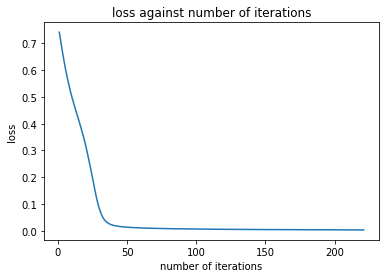

In [21]:
#plot loss against number of iterations
plt.plot(xpoints,ypoints)
plt.title("loss against number of iterations")
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.savefig("foo.jpeg")
plt.show()